# DATA SCIENCE IMMERSIVE - INSTRUCTOR CODE CHALLENGE

# Part 1: Modeling Challenge

### Import Libraries

In [1]:
#Import Libraries
import pandas as pd #Data manipulation and analysis.
import numpy as np #Mathematical operations.
import matplotlib.pyplot as plt #Visualization -  plotting library.
import seaborn as sns # to have more customizability.
from scipy.stats import median_test #Import median_test function from scipy.stats Library. 
from scipy import stats #scientific computing[T TEST].
from sklearn.utils import resample # generate samples
from scipy.stats import chi2_contingency # Import a chi-square function from scipy.stats Library.

## Task 1 Load in the data file and header file provided

### Load the dataset

In [2]:
# Define Dataframe Header
DHeader = ["ID", "diagnosis", "radius_mean", "radius_sd_error", "radius_worst", "texture_mean", "texture_sd_error", "texture_worst", "perimeter_mean", "perimeter_sd_error", "perimeter_worst", "area_mean", "area_sd_error", "area_worst", "smoothness_mean", "smoothness_sd_error", "smoothness_worst", "compactness_mean", "compactness_sd_error", "compactness_worst", "concavity_mean", "concavity_sd_error", "concavity_worst", "concave_points_mean", "concave_points_sd_error", "concave_points_worst", "symmetry_mean", "symmetry_sd_error", "symmetry_worst", "fractal_dimension_mean", "fractal_dimension_sd_error", "fractal_dimension_worst"]

In [3]:
#Load the CSV file - using names [DHheader] , Dataframe Name = FNA_DF 
FNA_DF = pd.read_csv("C:\\Users\\HP\\Desktop\\breast-cancer.csv", names=DHeader)

### Explore  the Dataframe.

In [4]:
#Explore FNA_DF Dataframe. 
FNA_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In [7]:
#Disply first 20 rows
FNA_DF.head(20)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [6]:
#Statistical Summary
FNA_DF.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Observation : The dataframe includes measurements of breast cancer cells for 569 cases [ 569 Rows]. The data set contains 32 Variable, one categorical variable [ nominal variable] : diagnosis(B benign - M malignant) and 30 numerical nariables plus ID) [ Total of 32 columns],  Missing values: none.

---
***

## Task 2 Compute the mean and median smoothness and compactness for benign and malignant tumors

In [8]:
### Class Distribution ###
# split the FNA_DF dataframe into (benign | malignant tumour) Class 
by_diagnosis = FNA_DF.groupby('diagnosis')

In [9]:
# Display the number of instances (rows) that belong to each class.
print(by_diagnosis.size())

diagnosis
B    357
M    212
dtype: int64


In [10]:
# display (smoothness, compactness) mean for each class
by_diagnosis['smoothness_mean','smoothness_sd_error','smoothness_worst','compactness_mean','compactness_sd_error','compactness_worst'].mean()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858
M,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060


In [11]:
# display (smoothness, compactness) median for each class
by_diagnosis['smoothness_mean','smoothness_sd_error','smoothness_worst','compactness_mean','compactness_sd_error','compactness_worst'].median()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,1.8510,19.630,0.006530,0.01631,0.018400,0.009061
M,3.6795,58.455,0.006209,0.02859,0.037125,0.014205


In [12]:
# display (smoothness, compactness) standard deviation for each class
by_diagnosis['smoothness_mean','smoothness_sd_error','smoothness_worst','compactness_mean','compactness_sd_error','compactness_worst'].std()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709
M,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517


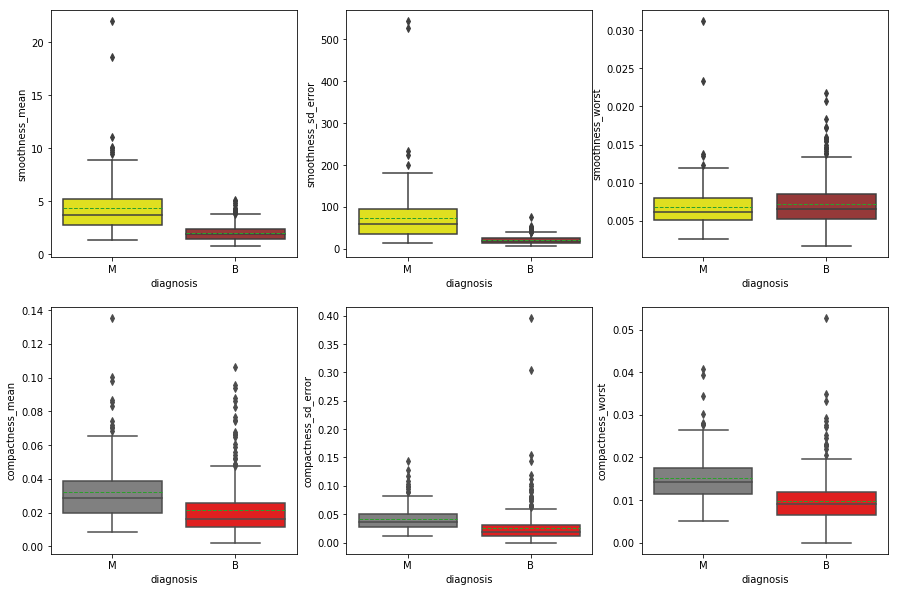

In [13]:
#Data Visualization - Explore smoothness_mean and compactness_mean

fig, axs = plt.subplots(nrows =2 , ncols=3,figsize=(15,10) ) #in order to create 2rows and 3columns and adjust the graph size. 

sns.boxplot(y='smoothness_mean', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,0]) # the first Boxplot - Display mean [ Dot-line ] 
sns.boxplot(y='smoothness_sd_error', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,1]) # the first Boxplot - Display mean [ Dot-line ] 
sns.boxplot(y='smoothness_worst', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,2]) # the first Boxplot - Display mean [ Dot-line ]
sns.boxplot(y='compactness_mean', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,0]) # the second Boxplot - - Display mean [ Dot-line ]
sns.boxplot(y='compactness_sd_error', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,1]) # the second Boxplot - - Display mean [ Dot-line ]
sns.boxplot(y='compactness_worst', x='diagnosis',  data=FNA_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,2]) # the second Boxplot - - Display mean [ Dot-line ]

** Observation :**
* The median for all variables, which is the middle number when you sort the data from smallest to largest, lies in the lower range of values (where most of the numbers are). This suggest that, for smoothness(local variation in radius lengths) and compactness (perimeter² / area — 1.0) variables, the dataset has a distribution that is skewed right.

** Mann-Whitney test: **
* To compare the differences between the two samples (smoothness, compactness) for each class (benign B | malignant M) tumour and to understand the central tendency
* We performed Mann-Whitney test to understand whether smoothness and compactness measured on a continuous scale differed based on tumour type. 
* Mann-Whitney test: the number of observations in each sample is > 20 and you have 2 independent samples of ranks.

### Mann-Whitney U Test  ###

#### Step 1 Determine null and alternate hypothesis.

In [14]:
#null hypothesis: The feature values (smoothness and compactness scale) is equal between the two groups (benign | malignant) tumour. 
#alternate hypothesis: The feature values (smoothness and compactness scale) is not equal between the two groups (benign | malignant) tumour.

#### Step 2 Identify the 2 groups, Create 2 data frames to make the code in the next steps a bit cleaner

In [15]:
FNA_Malignant_DF = FNA_DF.groupby(['diagnosis']).get_group('M')
FNA_Benign_DF = FNA_DF.groupby(['diagnosis']).get_group('B')

In [16]:
# Display dataframes.
FNA_Malignant_DF.head(20)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [17]:
FNA_Benign_DF.head(20)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409
48,857155,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301
49,857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025
52,857374,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,...,13.100,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408


#### Step 3 Test the assumption of normality using the stats.shapiro().

In [18]:
stats.shapiro(FNA_Malignant_DF['smoothness_mean']) #smoothness_mean for Malignant tumor

(0.7813737988471985, 1.6916448361173315e-16)

In [19]:
stats.shapiro(FNA_Benign_DF['smoothness_mean']) #smoothness_mean for Benign tumor. 

(0.9207149744033813, 8.520204398780595e-13)

In [20]:
stats.shapiro(FNA_Malignant_DF['compactness_mean']) #compactness_mean for Malignant tumor

(0.8615323305130005, 6.022028036824223e-13)

In [21]:
stats.shapiro(FNA_Benign_DF['compactness_mean']) #compactness_mean for Benign tumor.

(0.7793111205101013, 1.2745970724970268e-21)

In [22]:
stats.shapiro(FNA_Malignant_DF['compactness_sd_error']) #compactness_sd_error for Malignant tumor

(0.8788233995437622, 5.338887318351304e-12)

In [23]:
stats.shapiro(FNA_Benign_DF['smoothness_worst']) #smoothness_worst for Benign tumor.

(0.8880958557128906, 1.7397634278920886e-15)

In [24]:
stats.shapiro(FNA_Malignant_DF['compactness_worst']) #compactness_worst for Malignant tumor. 

(0.9117917418479919, 6.627420279237128e-10)

In [25]:
stats.shapiro(FNA_Benign_DF['smoothness_sd_error']) #smoothness_sd_error for Benign tumor.

(0.895918071269989, 6.757169337820923e-15)

#### OBSERVATION : The variables of interest [ smoothness  - compactness  amonge tumor ] violates the assumption of normality [Consistent with the graph]

In [32]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(FNA_Benign_DF['smoothness_mean'], FNA_Malignant_DF['smoothness_mean'], alternative='two-sided')

MannwhitneyuResult(statistic=9355.0, pvalue=5.099437378225837e-51)

In [33]:
stats.mannwhitneyu(FNA_Benign_DF['compactness_mean'], FNA_Malignant_DF['compactness_mean'], alternative='two-sided')

MannwhitneyuResult(statistic=20640.5, pvalue=1.1680614494180086e-19)

In [34]:
stats.mannwhitneyu(FNA_Benign_DF['smoothness_sd_error'], FNA_Malignant_DF['smoothness_sd_error'], alternative='two-sided')

MannwhitneyuResult(statistic=5569.5, pvalue=5.7678233744133e-65)

In [35]:
stats.mannwhitneyu(FNA_Benign_DF['compactness_sd_error'], FNA_Malignant_DF['compactness_sd_error'], alternative='two-sided')

MannwhitneyuResult(statistic=16588.5, pvalue=3.675507795924406e-29)

In [36]:
stats.mannwhitneyu(FNA_Benign_DF['compactness_worst'], FNA_Malignant_DF['compactness_worst'], alternative='two-sided')

MannwhitneyuResult(statistic=15758.0, pvalue=2.3708516259551307e-31)

In [37]:
stats.mannwhitneyu(FNA_Benign_DF['smoothness_worst'], FNA_Malignant_DF['smoothness_worst'], alternative='two-sided')

MannwhitneyuResult(statistic=40200.5, pvalue=0.21363163320046263)

** OBSERVATION: Since the p-value  is  less than 0.05  we  reject the null hypothesis. thus, there is a sufficient evidence to say that the smoothness and compactness values is different between the two groups. **
* Except for smoothness_worst which have no different between the two groups.

** Double-Check [ Welch's t-test remains robust for skewed distributions and large sample sizes-see Fagerland, M. W. (2012) ] **

In [26]:
#To double check, we conduct a Welch’s t-test, use the stats.ttest_ind() - equal_var=False
stats.ttest_ind(FNA_Benign_DF['smoothness_mean'], FNA_Malignant_DF['smoothness_mean'], equal_var = False)

Ttest_indResult(statistic=-12.83276274696711, pvalue=6.868552881086801e-29)

In [27]:
stats.ttest_ind(FNA_Benign_DF['compactness_mean'], FNA_Malignant_DF['compactness_mean'], equal_var = False)

Ttest_indResult(statistic=-7.082641476498329, pvalue=6.341807077270803e-12)

In [28]:
stats.ttest_ind(FNA_Benign_DF['smoothness_sd_error'], FNA_Malignant_DF['smoothness_sd_error'], equal_var = False)

Ttest_indResult(statistic=-12.155555679119491, pvalue=2.983567645621385e-26)

In [29]:
stats.ttest_ind(FNA_Benign_DF['compactness_sd_error'], FNA_Malignant_DF['compactness_sd_error'], equal_var = False)

Ttest_indResult(statistic=-6.916304509499919, pvalue=1.2665140376966787e-11)

In [30]:
stats.ttest_ind(FNA_Benign_DF['compactness_worst'], FNA_Malignant_DF['compactness_worst'], equal_var = False)

Ttest_indResult(statistic=-10.735451648162124, pvalue=4.042197239517219e-24)

In [31]:
stats.ttest_ind(FNA_Benign_DF['smoothness_worst'], FNA_Malignant_DF['smoothness_worst'], equal_var = False)

Ttest_indResult(statistic=1.6228692577349724, pvalue=0.10529700302804572)

** The p-value is significant, therefore we reject the null hypothesis in support of the alternative, which means that the smoothness [ mean-sd_error ] of benign is not equal to the mean of malignant tumour. Except for smoothness worst witch have no difference between the two groups. **

** The compactness [ mean-sd_error-worst] of benign is not equal to the compactness values of malignant tumour. **

In [38]:
# Check the degrees of freedom (DoF) - define welch_dof(x,y) function. 
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
# Run welch_dof(x,y) - x = FNA_Benign_DF, y = FNA_Malignant_DF .       
welch_dof(FNA_Benign_DF['smoothness_mean'], FNA_Malignant_DF['smoothness_mean'])

Welch-Satterthwaite Degrees of Freedom= 233.7969


** A Welch’s T-test test was conducted to measure smoothness of benign and malignant tumour. There was a significant difference in the smoothness mean scores for benign tumour (M=2.00, SD=0.77) and malignant (M=4.32, SD=2.57) tumour; Mann-Whitney was selected to analyse the data because of the homogeneity of variances that indicated unequal variances between groups. The smoothness difference in tumour type is significant. (Welch's t (-12.83)= 233.7969, p< 0.0006 e-25) **

In [39]:
# Run welch_dof(x,y) - x = FNA_Benign_DF, y = FNA_Malignant_DF 
welch_dof(FNA_Benign_DF['compactness_mean'], FNA_Malignant_DF['compactness_mean'])

Welch-Satterthwaite Degrees of Freedom= 403.0342


#### A Welch’s T-test was conducted to measure compactness of benign and malignant tumour. There was a significant difference in the compactness mean scores for benign tumour (M=0.0214, SD=0.016) and malignant (M=0.032, SD=0.018) tumour; Welch’s t-test was selected to analyse the data because of the homogeneity of variances that indicated unequal variances between groups. The smoothness difference in tumour is significant. (Welch's t (-7.082)= 403.0342, p< 0.0006 -8).

---
***

## Mood’s median test

In [40]:
#Mood’s median test
    #The null hypothesis for this test is that the medians are the same for both groups.
    #The alternate hypothesis for the test is that the medians are different for both groups.
#Import median_test function from scipy.stats Library. 
from scipy.stats import median_test
#Run median_test  for FNA_Benign_DF['compactness_mean'], FNA_Malignant_DF['compactness_mean']
stat, p, med, tbl = median_test(FNA_Benign_DF['compactness_mean'], FNA_Malignant_DF['compactness_mean'])

In [41]:
#Display The grand median.
med

0.02045

In [42]:
#Display the contingency table 
tbl

array([[128, 156],
       [229,  56]], dtype=int64)

In [43]:
# Perform a chi-square test on the completed contingency table.
from scipy.stats import chi2_contingency
chi2_contingency(tbl)

(74.2408083954673,
 6.914602528857842e-18,
 1,
 array([[178.18629174, 105.81370826],
        [178.81370826, 106.18629174]]))

#### The χ2 value is 74.240, with a p-value of well below a significance level of 0.05. reject the null hypothesis H0 in favour of the alternate hypothesis and conclude that Benign and Malignant tumour have different compactness medians.

In [44]:
#Run median_test  for FNA_Benign_DF['smoothness_mean'], FNA_Malignant_DF['smoothness_mean']
stats, ps, meds, tbs = median_test(FNA_Benign_DF['smoothness_mean'], FNA_Malignant_DF['smoothness_mean'])

In [45]:
#Display The grand median.
meds

2.287

In [46]:
#Display the contingency table 
tbs

array([[105, 179],
       [252,  33]], dtype=int64)

In [47]:
# Perform a chi-square test on the completed contingency table.
chi2_contingency(tbs)

(158.88194504440074,
 1.985798026355439e-36,
 1,
 array([[178.18629174, 105.81370826],
        [178.81370826, 106.18629174]]))

#### The χ2 value is 158.88, with a p-value of well below a significance level of 0.05. reject the null hypothesis H0 in favour of the alternate hypothesis and conclude that Benign and Malignant tumour have different smoothness medians.

---
***

## Task 3: Write a function to generate bootstrap samples of the data.

### Step 1 Configuration of the Bootstrap: Sample Size = 1000, Repetitions = 50

### Step 2 call the scikit-learn bootstrap [ from sklearn.utils import resample ] 

In [48]:
from sklearn.utils import resample

In [49]:
# prepare bootstrap sample : dataframe = FNA_DF, n_samples= Sample size, random_state= Repetitions
FNA_BOOT_DF = resample(FNA_DF, replace=True, n_samples=1000, random_state=50)
print('Bootstrap Sample: %s' % FNA_BOOT_DF)

Bootstrap Sample:             ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
480     912193         B       12.160            18.03         78.29   
109     864018         B       11.340            21.26         72.48   
289   89143601         B       11.370            18.89         72.17   
132   86730502         M       16.160            21.54        106.20   
70      859575         M       18.940            21.31        123.60   
229     881861         M       12.830            22.33         85.26   
70      859575         M       18.940            21.31        123.60   
278    8911800         B       13.590            17.84         86.24   
133     867387         B       15.710            13.93        102.00   
258     887181         M       15.660            23.20        110.20   
95       86208         M       20.260            23.03        132.40   
250     884948         M       20.940            23.56        138.90   
71      859711         B        8.888         

In [50]:
#Explore FNA_BOOT_DF Dataframe. 
FNA_BOOT_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 480 to 112
Data columns (total 32 columns):
ID                            1000 non-null int64
diagnosis                     1000 non-null object
radius_mean                   1000 non-null float64
radius_sd_error               1000 non-null float64
radius_worst                  1000 non-null float64
texture_mean                  1000 non-null float64
texture_sd_error              1000 non-null float64
texture_worst                 1000 non-null float64
perimeter_mean                1000 non-null float64
perimeter_sd_error            1000 non-null float64
perimeter_worst               1000 non-null float64
area_mean                     1000 non-null float64
area_sd_error                 1000 non-null float64
area_worst                    1000 non-null float64
smoothness_mean               1000 non-null float64
smoothness_sd_error           1000 non-null float64
smoothness_worst              1000 non-null float64
compactness

In [51]:
# out of bag observations
oob = [x for x in FNA_DF['ID'] if x not in FNA_BOOT_DF['ID']]
print('OOB Sample: %s' % oob)

OOB Sample: [842302, 842517, 84300903, 84348301, 84358402, 843786, 844359, 84458202, 844981, 84501001, 845636, 84610002, 846226, 846381, 84667401, 84799002, 848406, 84862001, 849014, 8510426, 8510653, 8510824, 8511133, 851509, 852552, 852631, 852763, 852781, 852973, 853201, 853401, 853612, 85382601, 854002, 854039, 854253, 854268, 854941, 855133, 855138, 855167, 855563, 855625, 856106, 85638502, 857010, 85713702, 85715, 857155, 857156, 857343, 857373, 857374, 857392, 857438, 85759902, 857637, 857793, 857810, 858477, 858970, 858981, 858986, 859196, 85922302, 859283, 859464, 859465, 859471, 859487, 859575, 859711, 859717, 859983, 8610175, 8610404, 8610629, 8610637, 8610862, 8610908, 861103, 8611161, 8611555, 8611792, 8612080, 8612399, 86135501, 86135502, 861597, 861598, 861648, 861799, 861853, 862009, 862028, 86208, 86211, 862261, 862485, 862548, 862717, 862722, 862965, 862980, 862989, 863030, 863031, 863270, 86355, 864018, 864033, 86408, 86409, 864292, 864496, 864685, 864726, 864729, 86

In [52]:
#Statistical Summary
FNA_BOOT_DF.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.259547e+07,14.245160,19.253230,92.821270,668.022500,0.096771,0.105891,0.092109,0.050339,0.182826,...,16.427120,25.691500,108.426430,899.57690,0.133509,0.259282,0.280428,0.117202,0.294658,0.084287
std,1.354972e+08,3.635131,3.944332,25.106937,363.668115,0.013820,0.053763,0.084400,0.040531,0.026927,...,4.913992,5.761187,34.257534,578.31414,0.022274,0.153408,0.213754,0.066451,0.061765,0.017340
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.20000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.689670e+05,11.640000,16.540000,74.832500,412.575000,0.086917,0.066230,0.029720,0.020730,0.163350,...,13.010000,21.420000,84.080000,514.97500,0.119200,0.151675,0.117775,0.065480,0.255100,0.072070
50%,9.051895e+05,13.465000,18.945000,87.320000,559.200000,0.096760,0.094860,0.059880,0.033410,0.180100,...,15.140000,25.470000,98.890000,706.00000,0.132250,0.218700,0.232000,0.101350,0.285200,0.080610
75%,8.712853e+06,16.110000,21.540000,106.200000,800.000000,0.105300,0.131075,0.135475,0.079500,0.197400,...,19.200000,29.430000,127.300000,1102.00000,0.148125,0.342225,0.397600,0.170800,0.321600,0.092410
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,...,36.040000,49.540000,251.200000,4254.00000,0.222600,0.932700,1.252000,0.291000,0.663800,0.173000


---
***

## Exploratory Analysis

## Task 4 Identify 2-3 variables that are predictive of a malignant tumor.

In [53]:
# separate the data according to mean, standard error and worst.
# Separating the mean columns and looking into the data
list_mean=[ "diagnosis", "radius_mean",  "texture_mean",  "perimeter_mean", "area_mean",  "smoothness_mean",  "compactness_mean", "concavity_mean",  "concave_points_mean",  "symmetry_mean",  "fractal_dimension_mean"]
FNA_MEAN_DF=FNA_BOOT_DF[list_mean]
FNA_MEAN_DF.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
480,B,12.16,455.3,0.02916,0.06284,1.678,0.01666,0.01454,27.87,0.1208,0.05690
109,B,11.34,396.5,0.05133,0.06529,1.597,0.01557,0.01568,29.15,0.1699,0.08278
289,B,11.37,396.0,0.02399,0.05955,1.954,0.01395,0.03416,26.14,0.1118,0.06203
132,M,16.16,809.8,0.10430,0.05891,2.844,0.01952,0.01535,31.68,0.1395,0.13120
70,M,18.94,1130.0,0.10800,0.05461,5.486,0.01652,0.01386,26.58,0.1193,0.17890


### Step 1 Boxplot the variables

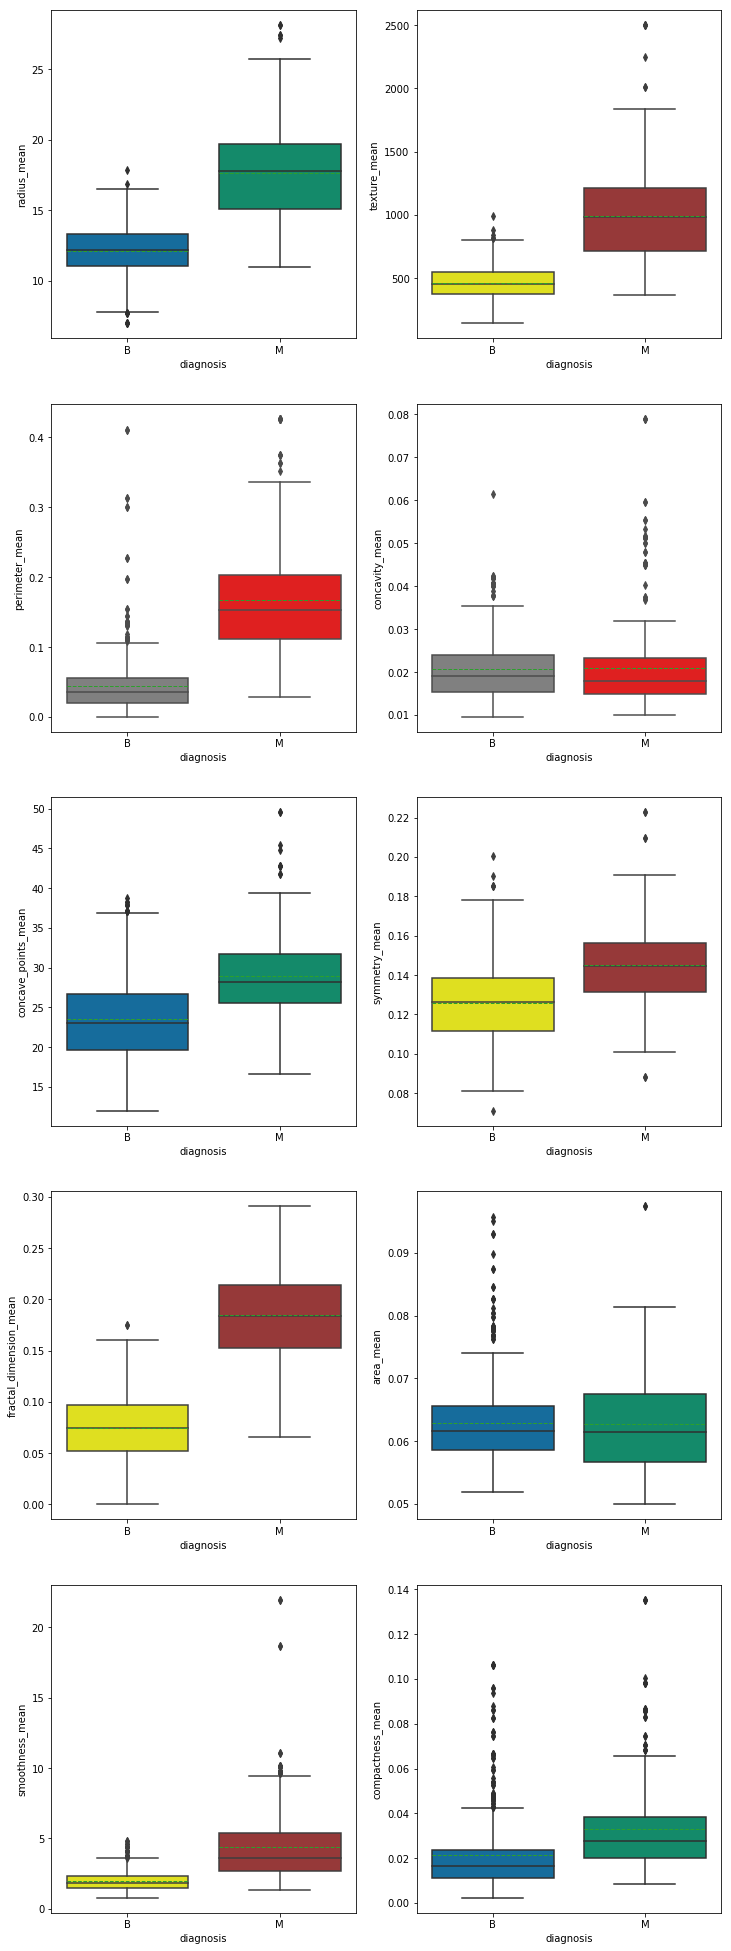

In [54]:
fig, axs = plt.subplots(nrows =5 , ncols=2,figsize=(12,35) ) #in order to create 5*2 matrix and adjust the graph size. 

sns.boxplot(y='radius_mean', x='diagnosis',  data=FNA_MEAN_DF,showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[0,0]) # the first Boxplot 
sns.boxplot(y='texture_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,1]) # the second Boxplot 
sns.boxplot(y='perimeter_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,0]) # the third Boxplot
sns.boxplot(y='concavity_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,1]) # the fourth Boxplot
sns.boxplot(y='concave_points_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[2,0]) # the fifth Boxplot
sns.boxplot(y='symmetry_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[2,1]) # the sixth Boxplot
sns.boxplot(y='fractal_dimension_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[3,0]) # the seventh Boxplot
sns.boxplot(y='area_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[3,1]) # the eighth Boxplot
sns.boxplot(y='smoothness_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[4,0]) # the ninth Boxplot
sns.boxplot(y='compactness_mean', x='diagnosis',  data=FNA_MEAN_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[4,1]) # the tenth Boxplot

In [55]:
# Separating the standard deviation columns and looking into the data
list_sd_error=[ "diagnosis", "radius_sd_error",  "texture_sd_error",  "perimeter_sd_error", "area_sd_error",  "smoothness_sd_error",  "compactness_sd_error", "concavity_sd_error",  "concave_points_sd_error",  "symmetry_sd_error",  "fractal_dimension_sd_error"]
FNA_sd_error_DF=FNA_BOOT_DF[list_sd_error]
FNA_sd_error_DF.head()

,diagnosis,radius_sd_error,texture_sd_error,perimeter_sd_error,area_sd_error,smoothness_sd_error,compactness_sd_error,concavity_sd_error,concave_points_sd_error,symmetry_sd_error,fractal_dimension_sd_error
480,B,18.03,0.09087,0.01527,0.2194,16.26,0.01397,0.001858,88.83,0.22790,0.2406
109,B,21.26,0.08759,0.01899,0.2344,16.41,0.02443,0.002477,83.99,0.21960,0.2829
289,B,18.89,0.08713,0.02173,0.2656,17.49,0.01376,0.002928,79.29,0.09708,0.3267
132,M,21.54,0.10080,0.05613,0.4332,43.68,0.02219,0.002373,129.70,0.30550,0.3480
70,M,21.31,0.09009,0.07951,0.7888,96.05,0.02269,0.001698,165.90,0.23360,0.2551


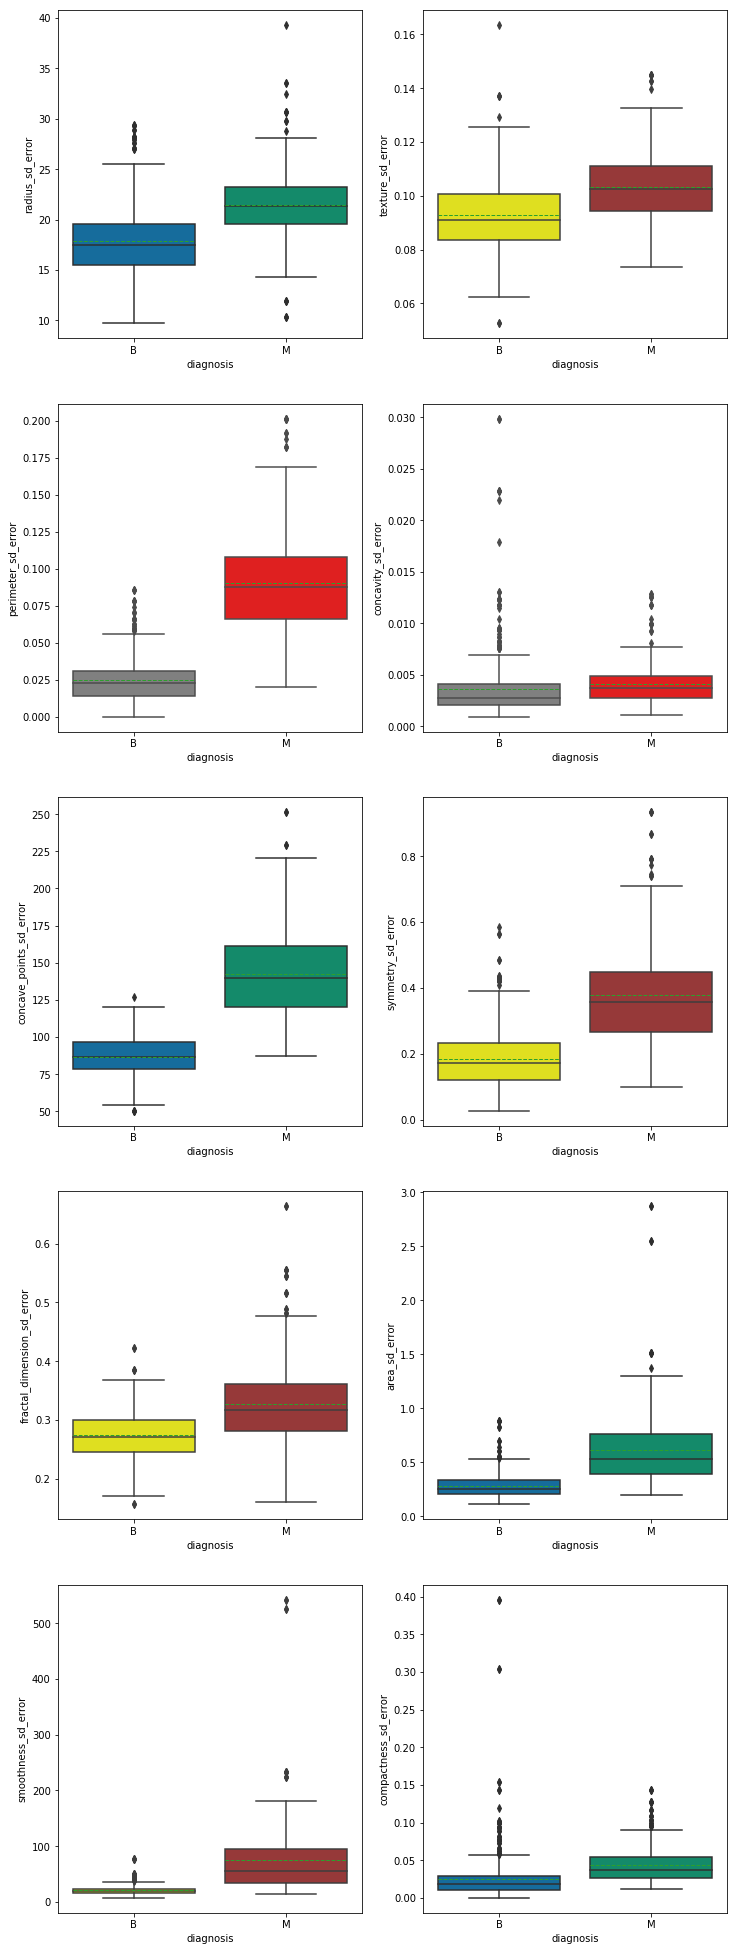

In [56]:
fig, axs = plt.subplots(nrows =5 , ncols=2,figsize=(12,35) ) #in order to create 5*2 matrix and adjust the graph size. 

sns.boxplot(y='radius_sd_error', x='diagnosis',  data=FNA_sd_error_DF,showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[0,0]) # the first Boxplot 
sns.boxplot(y='texture_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,1]) # the second Boxplot 
sns.boxplot(y='perimeter_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,0]) # the third Boxplot
sns.boxplot(y='concavity_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,1]) # the fourth Boxplot
sns.boxplot(y='concave_points_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[2,0]) # the fifth Boxplot
sns.boxplot(y='symmetry_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[2,1]) # the sixth Boxplot
sns.boxplot(y='fractal_dimension_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[3,0]) # the seventh Boxplot
sns.boxplot(y='area_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[3,1]) # the eighth Boxplot
sns.boxplot(y='smoothness_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[4,0]) # the ninth Boxplot
sns.boxplot(y='compactness_sd_error', x='diagnosis',  data=FNA_sd_error_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[4,1]) # the tenth Boxplot

In [57]:
# Separating the worst columns and looking into the data
list_worst =[ "diagnosis", "radius_worst",  "texture_worst",  "perimeter_worst", "area_worst",  "smoothness_worst",  "compactness_worst", "concavity_worst",  "concave_points_worst",  "symmetry_worst",  "fractal_dimension_worst"]
FNA_worst_DF=FNA_BOOT_DF[list_worst]
FNA_worst_DF.head()

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
480,B,78.29,0.07838,0.1464,1.1900,0.004911,0.005161,13.34,547.4,0.16200,0.07729
109,B,72.48,0.06575,0.1487,0.9861,0.009113,0.006435,13.01,518.1,0.31200,0.08832
289,B,72.17,0.05008,0.2013,1.9740,0.006538,0.009924,12.36,459.3,0.07529,0.06994
132,M,106.20,0.12840,0.2160,1.2650,0.004877,0.009231,19.47,1175.0,0.29920,0.07619
70,M,123.60,0.10290,0.1582,0.7975,0.004444,0.013700,24.86,1866.0,0.26870,0.06589


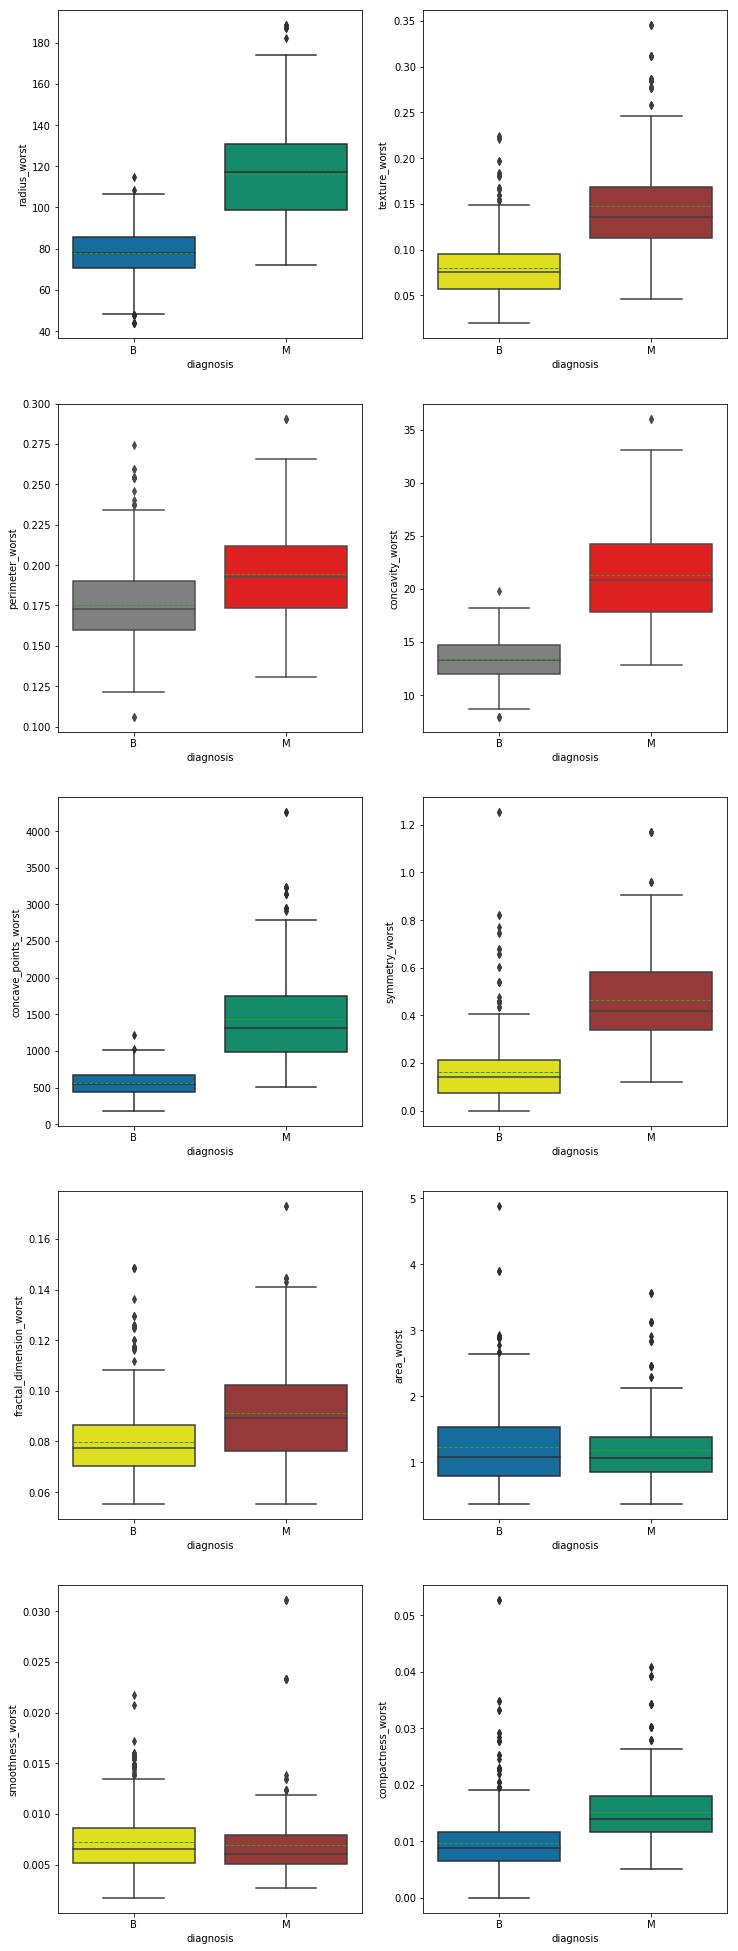

In [58]:
fig, axs = plt.subplots(nrows =5 , ncols=2,figsize=(12,35) ) #in order to create 5*2 matrix and adjust the graph size. 

sns.boxplot(y='radius_worst', x='diagnosis',  data=FNA_worst_DF,showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[0,0]) # the first Boxplot 
sns.boxplot(y='texture_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[0,1]) # the second Boxplot 
sns.boxplot(y='perimeter_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,0]) # the third Boxplot
sns.boxplot(y='concavity_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['grey','red'], ax=axs[1,1]) # the fourth Boxplot
sns.boxplot(y='concave_points_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[2,0]) # the fifth Boxplot
sns.boxplot(y='symmetry_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[2,1]) # the sixth Boxplot
sns.boxplot(y='fractal_dimension_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[3,0]) # the seventh Boxplot
sns.boxplot(y='area_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[3,1]) # the eighth Boxplot
sns.boxplot(y='smoothness_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette=['yellow','brown'], ax=axs[4,0]) # the ninth Boxplot
sns.boxplot(y='compactness_worst', x='diagnosis',  data=FNA_worst_DF, showmeans=True, meanline=True,
                 palette="colorblind", ax=axs[4,1]) # the tenth Boxplot

** Reducing the number of input variables when developing a predictive model.**
* Some of the features can have, most of the times, values that will fall in some range depending on the diagnosis been malignant or benign.
* Comparison of boxplots by malignancy shows that larger values of radius_mean, texture_mean, perimeter_mean, smoothness_mean,  fractal_dimension_mean, perimeter_sd_error, concave_points_sd_error,symmetry_sd_error,smoothness_sd_error, area_sd_error, radius_worst, concavity_worst, concave_points_worst, symmetry_worst tends to show a correlation with malignant tumours*


### Step 2 Histogram Plot 

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been 

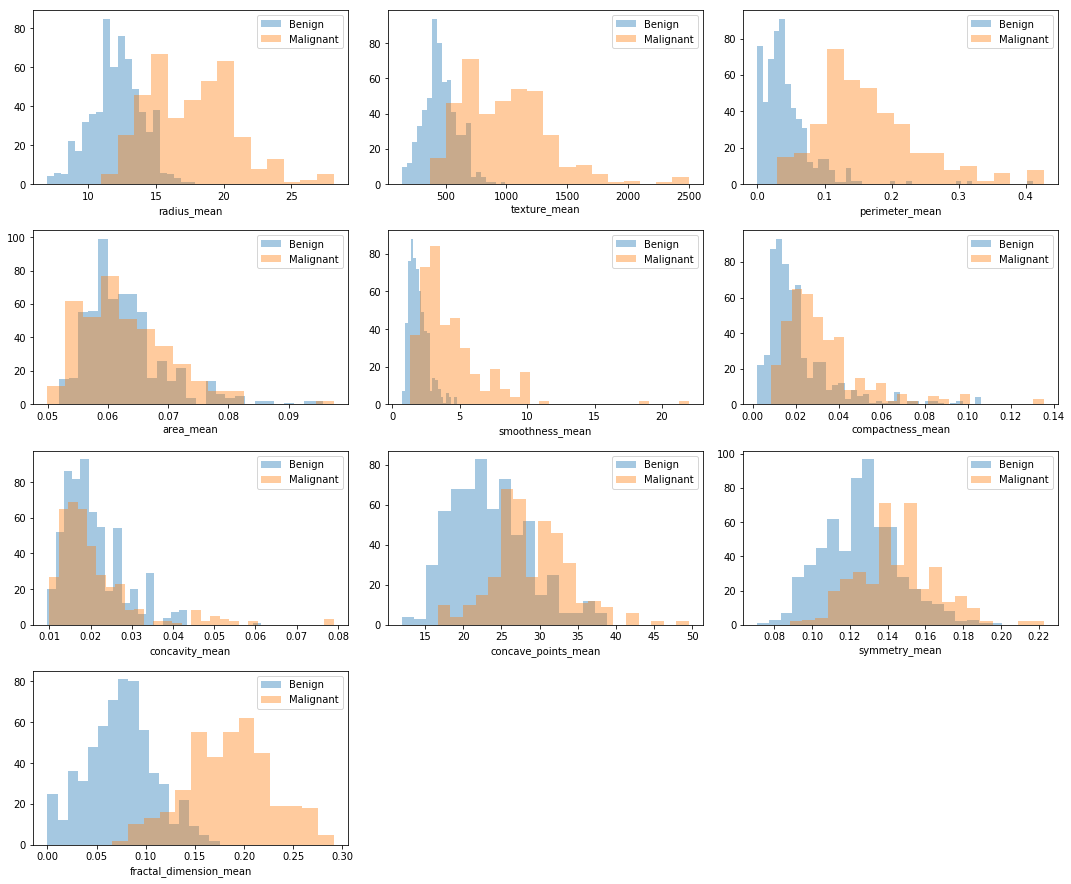

In [59]:
bins = 15
features_MEAN= list(FNA_MEAN_DF.columns[1:13])
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_MEAN):
    rows = int(len(features_MEAN)/2)
   
    plt.subplot(rows, 3, i+1)
    
    df = FNA_MEAN_DF[FNA_MEAN_DF.diagnosis == 'B']
    sns.distplot(df[feature],  kde=False,label='Benign')
    
    df =FNA_MEAN_DF[FNA_MEAN_DF.diagnosis == 'M']
    sns.distplot(df[feature],  kde=False,label='Malignant')
  
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been 

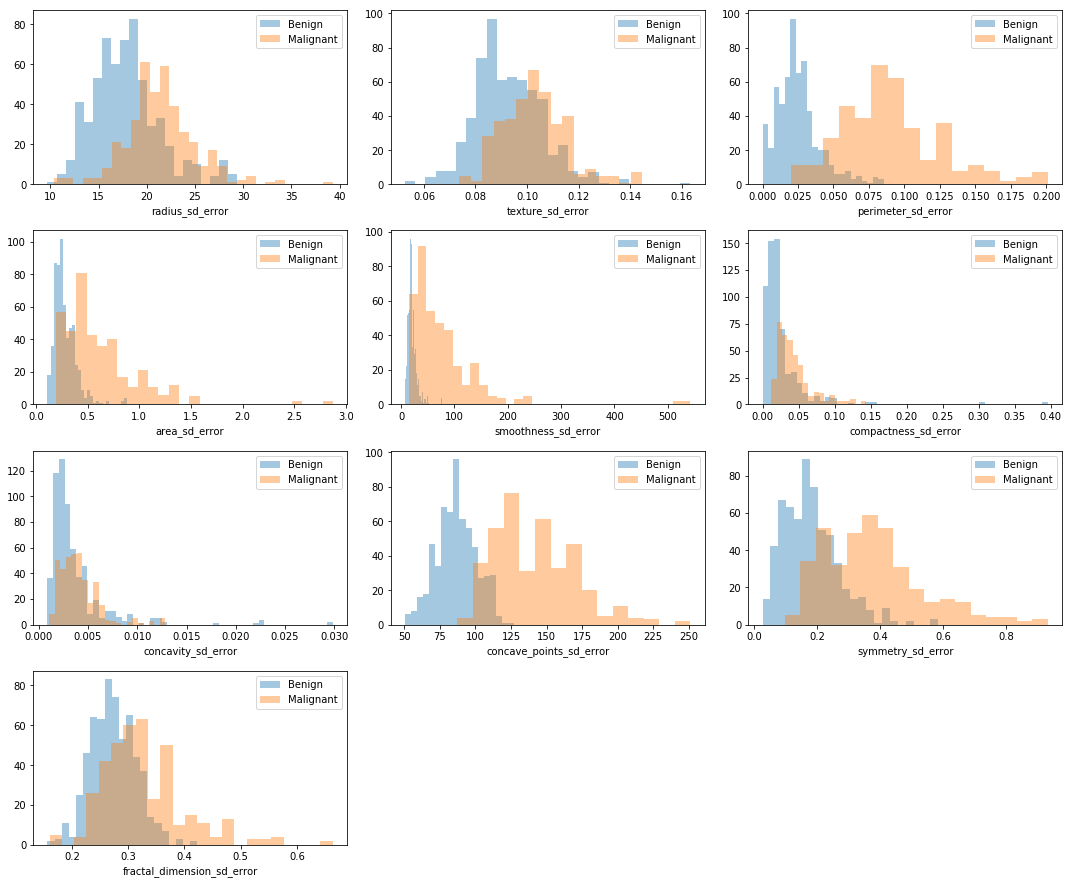

In [60]:
bins = 15
features_sd_error= list(FNA_sd_error_DF.columns[1:13])
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_sd_error):
    rows = int(len(features_sd_error)/2)
   
    plt.subplot(rows, 3, i+1)
    
    df = FNA_sd_error_DF[FNA_sd_error_DF.diagnosis == 'B']
    sns.distplot(df[feature],  kde=False,label='Benign')
    
    df =FNA_sd_error_DF[FNA_sd_error_DF.diagnosis == 'M']
    sns.distplot(df[feature],  kde=False,label='Malignant')
  
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been 

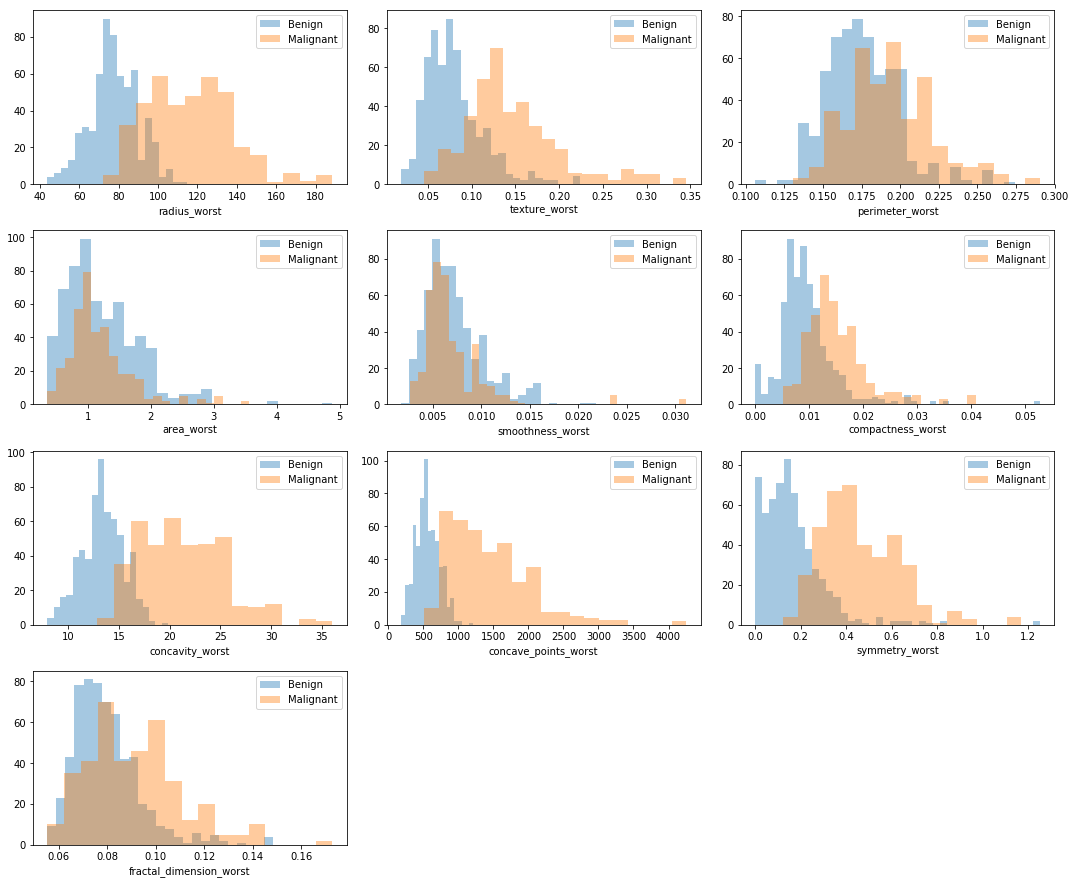

In [61]:
bins = 15
features_worst= list(FNA_worst_DF.columns[1:13])
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_worst):
    rows = int(len(features_worst)/2)
   
    plt.subplot(rows, 3, i+1)
    
    df = FNA_worst_DF[FNA_worst_DF.diagnosis == 'B']
    sns.distplot(df[feature],  kde=False,label='Benign')
    
    df =FNA_worst_DF[FNA_worst_DF.diagnosis == 'M']
    sns.distplot(df[feature],  kde=False,label='Malignant')
  
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Step 3 Scatter 

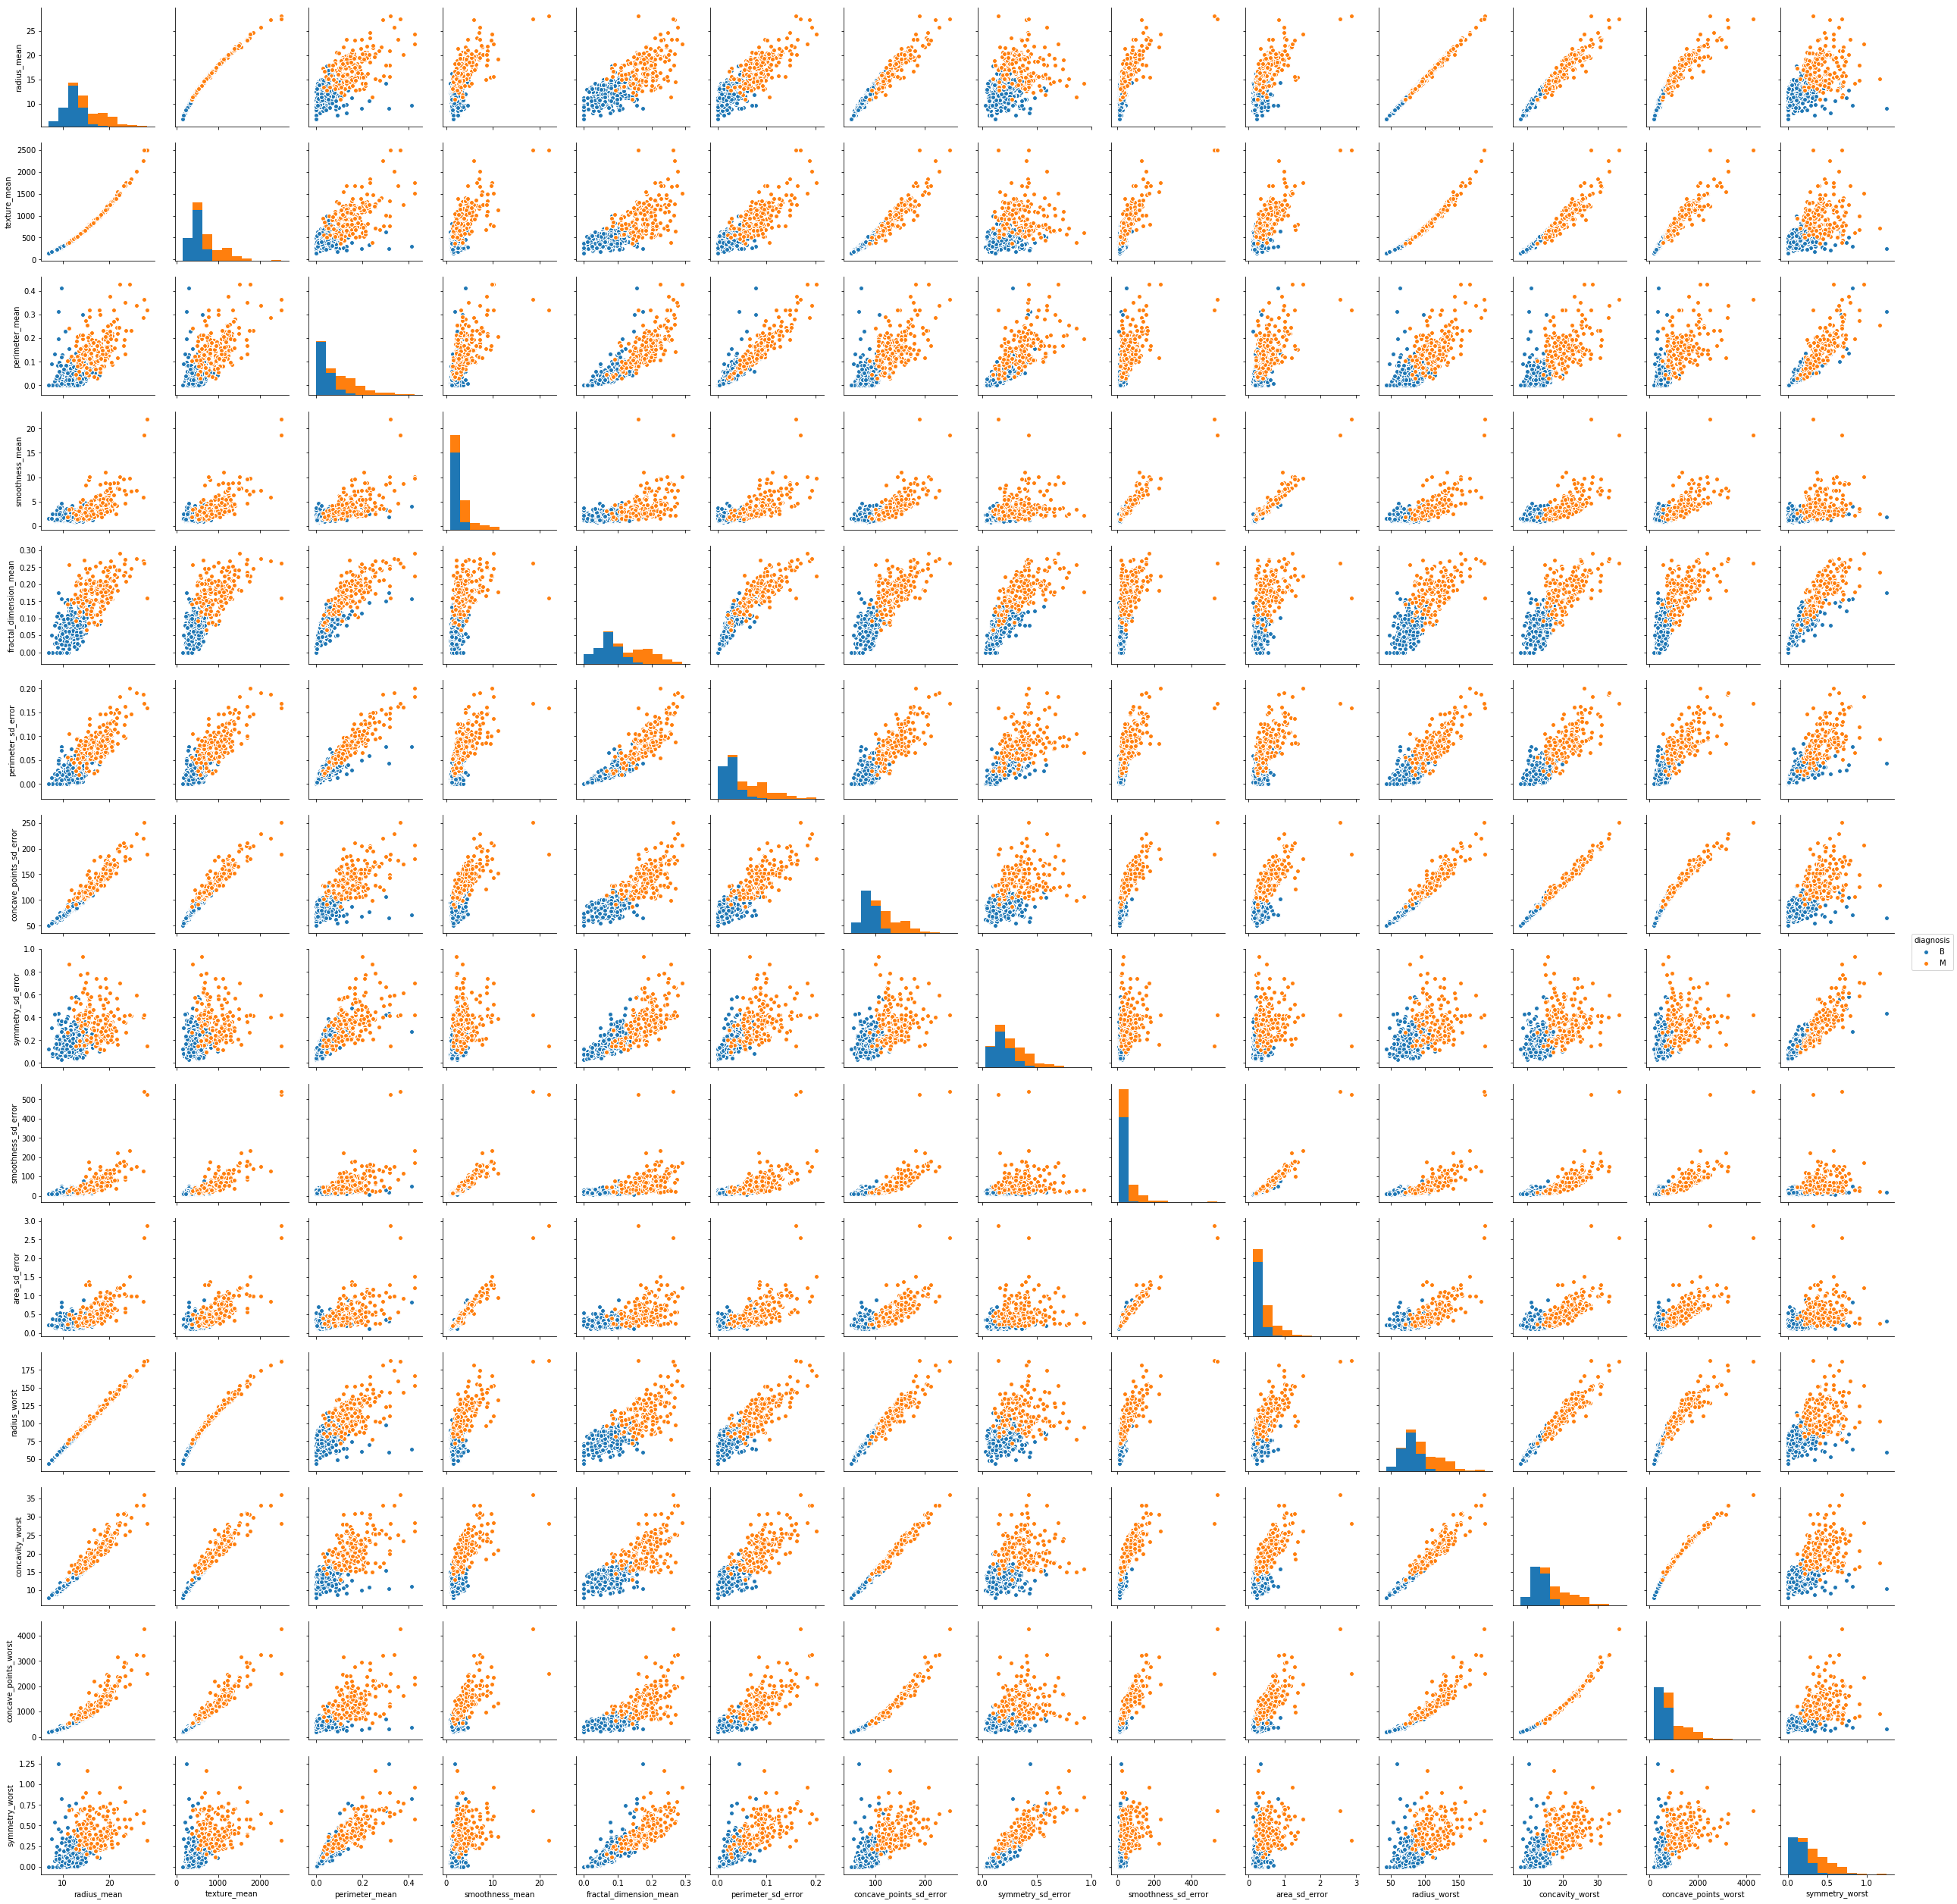

In [62]:
# Display a matrix of the visual representation of the relationship between the Selected variables: 
Selected_var_DF = FNA_BOOT_DF[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean", "fractal_dimension_mean", "perimeter_sd_error", "concave_points_sd_error", "symmetry_sd_error","smoothness_sd_error", "area_sd_error", "radius_worst", "concavity_worst", "concave_points_worst", "symmetry_worst"]]
sns.pairplot(Selected_var_DF, hue="diagnosis")

### Step 4 Correlation 

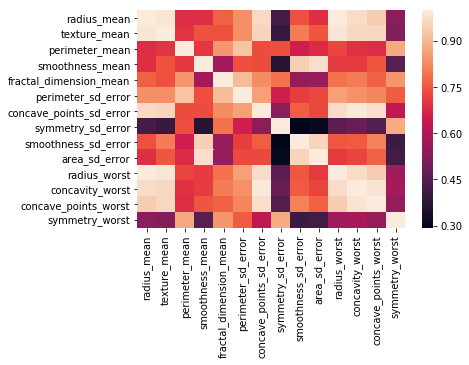

In [63]:
# Reduce the number of input variables by evaluating the correlations among each variable
ax = sns.heatmap(Selected_var_DF.corr())

In [64]:
#Replace diagnosis Values from m\B to 0\1 
replace_map = {'diagnosis': {'B': 0, 'M': 1}}   # Define the map 
print(replace_map)

{'diagnosis': {'B': 0, 'M': 1}}


In [65]:
Selected_var_DF.replace(replace_map, inplace=True)
print(Selected_var_DF.head())

     diagnosis  radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
480          0        12.16         455.3         0.02916            1.678   
109          0        11.34         396.5         0.05133            1.597   
289          0        11.37         396.0         0.02399            1.954   
132          1        16.16         809.8         0.10430            2.844   
70           1        18.94        1130.0         0.10800            5.486   

     fractal_dimension_mean  perimeter_sd_error  concave_points_sd_error  \
480                 0.05690             0.01527                    88.83   
109                 0.08278             0.01899                    83.99   
289                 0.06203             0.02173                    79.29   
132                 0.13120             0.05613                   129.70   
70                  0.17890             0.07951                   165.90   

     symmetry_sd_error  smoothness_sd_error  area_sd_error  radius_worst  

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


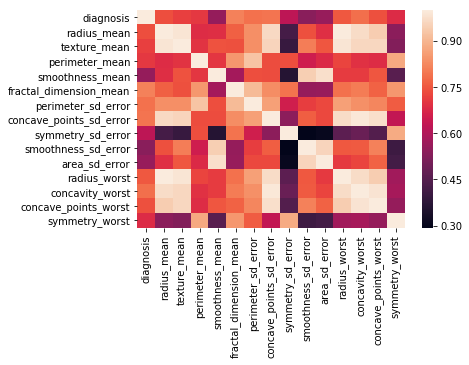

In [66]:
ax = sns.heatmap(Selected_var_DF.corr())

In [67]:
corrMatrix = Selected_var_DF.corr()
print (corrMatrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.739143      0.717004        0.705479   
radius_mean               0.739143     1.000000      0.987389        0.686575   
texture_mean              0.717004     0.987389      1.000000        0.697126   
perimeter_mean            0.705479     0.686575      0.697126        1.000000   
smoothness_mean           0.556108     0.688734      0.744357        0.704218   
fractal_dimension_mean    0.813859     0.763617      0.740878        0.850990   
perimeter_sd_error        0.789628     0.835641      0.836786        0.925839   
concave_points_sd_error   0.795027     0.965535      0.958387        0.735689   
symmetry_sd_error         0.624008     0.423030      0.396978        0.738545   
smoothness_sd_error       0.538556     0.741223      0.808507        0.654275   
area_sd_error             0.558745     0.693139      0.751505        0.681852   
radius_worst              0.

** From the Correlation Matrix, We eliminate smoothness, area and symmetry features because the Correlation is less than 0.7 **

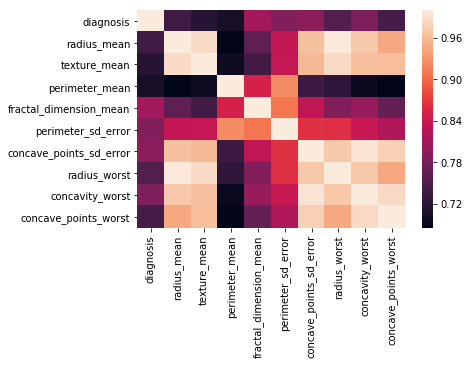

In [68]:
# Reduce the number of input variables by evaluating the correlations among each variable
ax = sns.heatmap(Selected_var_DF[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "fractal_dimension_mean", "perimeter_sd_error", "concave_points_sd_error", "radius_worst", "concavity_worst", "concave_points_worst"]].corr())

** The histograms and box plots illustrate difference between feature values by tumour type. Some features have values that will fall in some range depending on the diagnosis been malignant or benign. **

** Hence, Mean and worst values of cell radius, texture, perimeter, Fractal dimension mean, and concave points standard deviation can be used in classification of the cancer. Larger values of these parameters tend to show a correlation with malignant tumours. **

** Mean and standard deviation values of area, symmetry, compactness and smoothness or factual dimension does not show a particular preference of one diagnosis over the other. **

** To avoid Structural multicollinearity [independent variables in model are correlated.] we will use mean values [because it includes all of the data in the calculations]  of  radius ,texture, perimeter, fractal dimension and concave points standard deviation to develop the predictive model.. **

### Selected Features: radius_mean,  texture_mean,  perimeter_mean,  fractal_dimension_mean,  concave_points_sd_error. 

In [69]:
FNA_feature_DF =Selected_var_DF[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean",  "fractal_dimension_mean",  "concave_points_sd_error", ]]

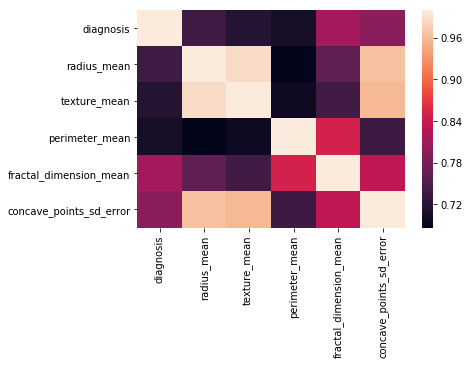

In [70]:
#Check the independence between the independent variables
sns.heatmap(FNA_feature_DF.corr())
plt.show()

** There is a huge correlation between "radius_mean", "texture_mean" **

---
***

## Modelling

### Task 5 Build a model to predict the malignant tumors.Use at least two classification techniques

### Model Development and Prediction: Preparation

** Step 1: Import the needed Python packages **

In [71]:
#sklearn:machine learning library- train_test_split: sample splitting function 
from sklearn.model_selection import train_test_split 
# import the LogisticRegression class
from sklearn.linear_model import LogisticRegression
# import the metrics class- Confusion Matrix[Model Evaluation]
from sklearn import metrics
#Import the SVM module
from sklearn import svm

** Step 2: Check the dataframe **

In [72]:
print(FNA_feature_DF.head())

     diagnosis  radius_mean  texture_mean  perimeter_mean  \
480          0        12.16         455.3         0.02916   
109          0        11.34         396.5         0.05133   
289          0        11.37         396.0         0.02399   
132          1        16.16         809.8         0.10430   
70           1        18.94        1130.0         0.10800   

     fractal_dimension_mean  concave_points_sd_error  
480                 0.05690                    88.83  
109                 0.08278                    83.99  
289                 0.06203                    79.29  
132                 0.13120                   129.70  
70                  0.17890                   165.90  


** Step 3: Assign feature ** 

In [73]:
#define dependent(or target variable) and independent variable(or feature variables).
#split dataset in features and target variable

x = FNA_feature_DF[["radius_mean", "texture_mean", "perimeter_mean", "fractal_dimension_mean",  "concave_points_sd_error"]] # Selected Features
y = FNA_feature_DF["diagnosis"] # Target variable

In [74]:
x.head()

,radius_mean,texture_mean,perimeter_mean,fractal_dimension_mean,concave_points_sd_error
480,12.16,455.3,0.02916,0.05690,88.83
109,11.34,396.5,0.05133,0.08278,83.99
289,11.37,396.0,0.02399,0.06203,79.29
132,16.16,809.8,0.10430,0.13120,129.70
70,18.94,1130.0,0.10800,0.17890,165.90


In [75]:
y.head()

480    0
109    0
289    0
132    1
70     1
Name: diagnosis, dtype: int64

In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 480 to 112
Data columns (total 5 columns):
radius_mean                1000 non-null float64
texture_mean               1000 non-null float64
perimeter_mean             1000 non-null float64
fractal_dimension_mean     1000 non-null float64
concave_points_sd_error    1000 non-null float64
dtypes: float64(5)
memory usage: 66.9 KB


** Step 4: Splitting the data **

In [77]:
#Dividing the dataset into a training set and a test set
X_train, X_test, Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=0) # select records randomly - test set size= 0.30*1000 = 300

In [78]:
# Display data
print("***** Train_Set *****")
print(X_train.head())
print("\n")
print("***** Test_Set *****")
print(X_test.head())

***** Train_Set *****
     radius_mean  texture_mean  perimeter_mean  fractal_dimension_mean  \
381       11.040         372.7         0.03546                 0.06754   
342       11.060         373.9         0.05397                 0.10750   
546       10.320         324.9         0.01012                 0.02381   
193       12.340         477.4         0.10850                 0.14590   
553        9.333         264.0         0.03996                 0.02564   

     concave_points_sd_error  
381                    79.73  
342                    79.76  
546                    71.12  
193                   101.70  
553                    62.86  


***** Test_Set *****
     radius_mean  texture_mean  perimeter_mean  fractal_dimension_mean  \
482        13.47         546.3         0.05786                 0.13350   
223        15.75         761.3         0.11470                 0.14790   
409        12.27         466.1         0.03211                 0.09532   
425        10.03         307

---
***

### logistic Regression

In [79]:
#Apply the logistic regression as follows:
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0) # instantiate the model (solver to solve optimization problem, C to Inverse of regularization strength, random_state to to shuffle the data)
# Regularization [Default L2]is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
#Train the model 
logreg.fit(X_train, Y_train) # fit the model with training data [Model Training]

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# generate predicted values
y_pred1=logreg.predict(X_test)

In [81]:
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [82]:
len(y_pred1)

300

** Model Evaluation using Confusion Matrix **

In [83]:
# generate the confusion Matrix
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred1)
cnf_matrix #Display the confusion Matrix

array([[183,   6],
       [  8, 103]], dtype=int64)

In [85]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred1))
print("Precision:",metrics.precision_score(Y_test, y_pred1))
print("Recall:",metrics.recall_score(Y_test, y_pred1))

Accuracy: 0.9533333333333334
Precision: 0.944954128440367
Recall: 0.9279279279279279


Text(0.5,257.44,'Predicted label')

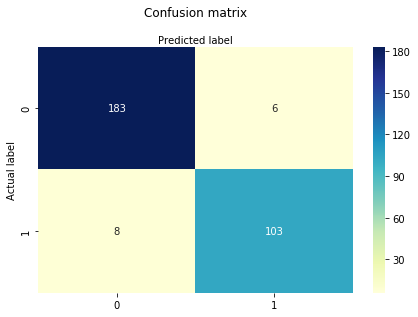

In [86]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

** The levels of accuracy of training and testing are good. **
** The classification rate of 95%, considered as good accuracy.**

* Precision: Precision is how accurate the model is.[ when a model makes a prediction, how often it is correct.] In this case, when the Logistic Regression model predicted patients suffer from malignant cancer or not , the model is 94% correct of the time.
* Recall: If there are patients who have malignant cancer in the test set, the model can identify it 92% of the time.*

*SECOND TRIAL*

In [87]:
#Apply the logistic regression as follows:
logreg2 = LogisticRegression(solver='liblinear', C=0.01, multi_class='ovr', random_state=0) # instantiate the model (solver to solve optimization problem, C to Inverse of regularization strength, random_state to to shuffle the data)
# Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.C=0.01
#Train the model 
logreg2.fit(X_train, Y_train) # fit the model with training data [Model Training]

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
# generate predicted values
y_pred2 =logreg2.predict(X_test)

In [89]:
# generate the confusion Matrix
cnf_matrix2 = metrics.confusion_matrix(Y_test, y_pred2)
cnf_matrix2 #Display the confusion Matrix

array([[183,   6],
       [ 19,  92]], dtype=int64)

In [90]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2))
print("Precision:",metrics.precision_score(Y_test, y_pred2))
print("Recall:",metrics.recall_score(Y_test, y_pred2))

Accuracy: 0.9166666666666666
Precision: 0.9387755102040817
Recall: 0.8288288288288288


Text(0.5,257.44,'Predicted label')

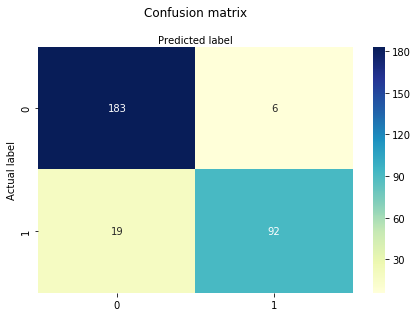

In [91]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

** The classification rate of 91%, considered as good accuracy. **

* Precision: Precision is how accurate the model is.[ when a model makes a prediction, how often it is correct.] In this case, when the Logistic Regression model predicted patients suffer from malignant cancer or not , the model is 93% correct of the time. *
* Recall:If there are patients who have malignant cancer in the test set, the model can identify it 82% of the time.*

** Overfiting: To prevent Overfitting we: ** 

* used Regularization[L1-L2] .the penalization is applied to decrease the magnitude of the parameters.A small value of C includes all the observations, allowing the margins to be calculated using all the data in the area.
* Train with more data - Bootstrap sample = 1000
* Remove features; 5 features only.*


** Advantages **
* easy to implement, easily interpretable,efficient *

** Disadvantages **
* vulnerable to overfitting, inefficient with large number of categorical features, inefficient with correlated features

** Note: we suggest using backward elimination automatically to include predictors that help maximize accuracy. **

---
***

### 2 Support Vector Machine (SVM) model

In [92]:
# instantiate the model,
clf = svm.SVC(kernel='linear', C=0.03)    

 #Train the model
clf.fit(X_train, Y_train)  

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
# generate predicted values
SVM_Y_pred = clf.predict(X_test)  

In [94]:
SVM_Y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [95]:
# generate the confusion Matrix
SVM_matrix = metrics.confusion_matrix(Y_test, SVM_Y_pred)
SVM_matrix #Display the confusion Matrix

array([[181,   8],
       [  8, 103]], dtype=int64)

In [96]:
print("Accuracy:",metrics.accuracy_score(Y_test, SVM_Y_pred))
print("Precision:",metrics.precision_score(Y_test, SVM_Y_pred))
print("Recall:",metrics.recall_score(Y_test, SVM_Y_pred))

Accuracy: 0.9466666666666667
Precision: 0.9279279279279279
Recall: 0.9279279279279279


Text(0.5,257.44,'Predicted label')

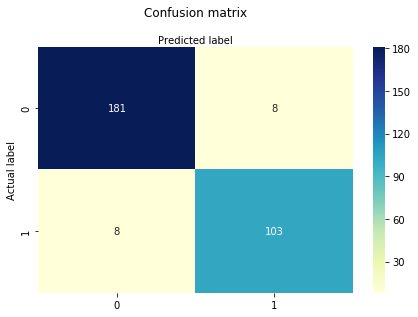

In [97]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(SVM_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

** The levels of accuracy of training and testing are good. **

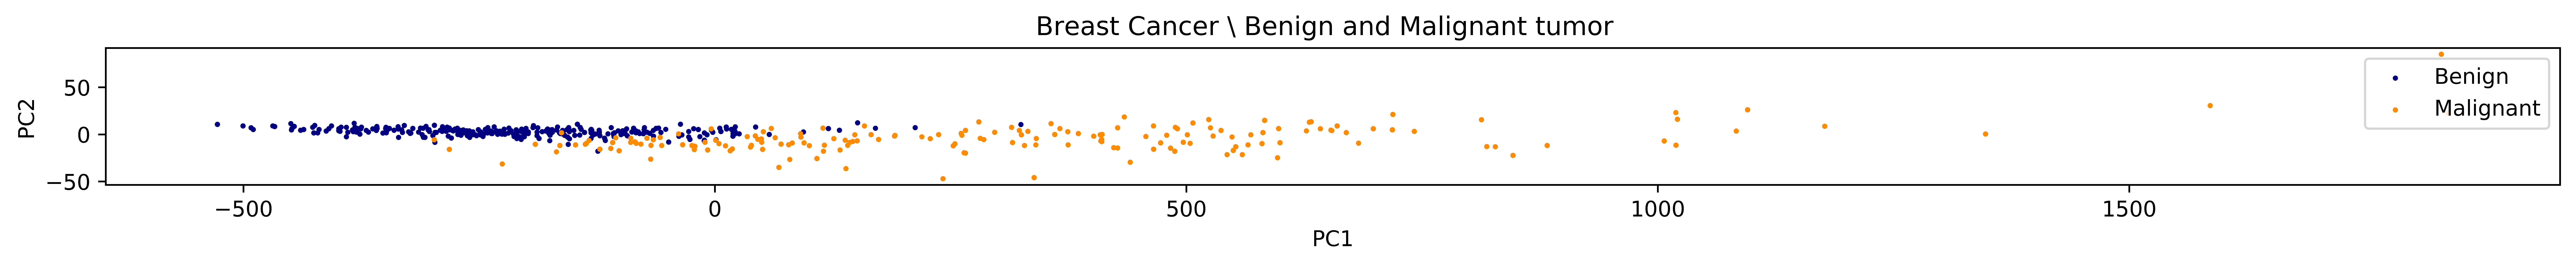

In [98]:
# Reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
from sklearn.decomposition import PCA
XX = FNA_feature_DF.iloc[:,1:]
yy = FNA_feature_DF.iloc[:,0]
pca = PCA(n_components=2).fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(pca, yy, random_state=0)

plt.figure(dpi=1000 , figsize = (20.4, 20.8) )

plt.scatter(pca[yy.values==0,0], pca[yy.values==0,1], alpha=1, label='Benign', s=2, color='navy' )
plt.scatter(pca[yy.values==1,0], pca[yy.values==1,1], alpha=1, label='Malignant', s=2, color='darkorange' )
plt.legend()
plt.title('Breast Cancer \ Benign and Malignant tumor  ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

---
***

### Task 6 Identify the most important predictive variables

In [99]:
#For logistic Regression - display the Coefficients
print(logreg.coef_, logreg.intercept_)

[[-1.94237723  0.01621024  0.13949552  0.11941952  0.16028001]] [-0.28401355]


** The most important predictive variable is radius_mean, **

---
***

---
***

# Part 2: Feedback

### Student Sample-1

** Constructive feedback:**

* the code is clear and easy to read with one statement per line. 
* However, more attention is needed with regards to: 
 1. Naming Conventions [ Never use the characters as single character variable names.] the use of data\d for dataframe is confusing
 2. adding through comments.
* Good use of basic python library [ pandas and numpy ] , however in order to call variety of linear models and LinearRegression functions you should use sklearn.linear_model. 
*  Define the features [indebendant variables] as arrays, Var = np.array(dataframe['column'])
* Check for the null values. 
* You should use the model and call .fit() to returns the variable model itself. - use y.reshape((-1, 1) becouse your data has a single feature.  
* Remember to splitting the data into training and testing sets before using the Regression[train_test_split] . 
* when evaluating the score by cross-validation ,use more cv to get cross-validation benefit.

### Student Sample-2

** Constructive feedback:**

* The code is clear and easy to read with one statement per line. 
* the Naming policy is clear but I recomend that you do not  use the characters as single character variable names.
* Good use of python library pandas, numpy and sklearn.linear_model module, 
* Well done the independent variable is the categorical one.
* Define the features [indebendant variables] as arrays, Var = np.array(dataframe['column'])
* Check for the null values. 
* You should use the model and call .fit() to returns the variable model itself. - use y.reshape((-1, 1) becouse your data has a single feature.  
* Remember to splitting the data into training and testing sets before using the Regression[train_test_split] . 
* when evaluating the score by cross-validation ,use more cv to get cross-validation benefit.